# Stock Analysis & Prediction - Sosio.in

## Candidate Name : Paluvadi Surya Vamsi
- Contact Number : +91 81100 20188
- Email Address : paluvadisurya@gmail.com

## AIM
- To create a linear model to estimate the closing stock value

![](https://i.imgur.com/3ZuhPJ2.png)

![](https://i.imgur.com/ZWp9AhG.png)

### Index
   - 01 -- Importing Data from SQL Servers
   - 02 -- Importing Req. libraries
   - 03 -- Data Loading
   - 04 -- Data Cleaning
   - 05 -- Data Visualozation
   - 06 -- Data Cleaning for our Model Preparation
   - 07 -- Linear Model Building
   - 08 -- Seaborn Analysis
   - 09 -- Conclusion

##  01 -- Importing Data from SQL Servers

In [1]:
# Retrieving the file provided by the technical recruiter
import mysql.connector
import pandas as pd

'''pip install mysql-connector-python'''
conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')
print(conn)

In [2]:
# Fetching the details of data from the SQL server
cursor = conn.cursor()
tables = cursor.execute('show tables')
tables

In [3]:
records = cursor.fetchall()
records

[('interview',)]

In [4]:
# Creating a database_dataframe for our reference
db = pd.read_sql_query('show tables', conn)
db

,Tables_in_stocksdb
0,interview


In [5]:
# Let us extract the interview database from the server using the pandas read_sql_query command
stock_df = pd.read_sql_query('select * from interview', conn)
type(stock_df)

pandas.core.frame.DataFrame

- We can save the dataframe obtained into our local system to work offline.

In [6]:
# We can save the dataframe using to_csv command of pandas to computer faster instead of using the internet.
# stock_data.to_csv('C://Users/Gold/Documents/stocks_data.csv')

## 02 -- Importing Req. Libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
start = time.time()

---

## 03 -- Data Loading

In [8]:
stock_df.head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [9]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
isin                  500000 non-null object
insertion_datetime    48060 non-null datetime64[ns]
datetime              500000 non-null datetime64[ns]
open                  500000 non-null float64
high                  500000 non-null float64
low                   500000 non-null float64
close                 500000 non-null float64
volume                500000 non-null int64
open_interest         48060 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 34.3+ MB


In [10]:
stock_df.describe()

,open,high,low,close,volume,open_interest
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,48060.00000
mean,1483.673727,1484.529598,1482.876855,1483.721753,407.884840,648.20102
std,1231.689627,1232.654749,1230.771130,1231.747869,2228.894209,1494.05814
min,9.000000,9.000000,9.000000,9.000000,0.000000,0.00000
25%,587.750000,587.950000,587.500000,587.750000,0.000000,91.00000
50%,891.600000,892.100000,891.000000,891.525000,0.000000,239.50000
75%,2365.000000,2365.012500,2365.000000,2365.000000,107.000000,616.00000
max,4927.950000,4953.900000,4855.400000,4928.000000,365036.000000,47171.00000


---

## 04 -- Data Cleaning

In [11]:
# Lets Look at the data
stock_df.columns

Index(['isin', 'insertion_datetime', 'datetime', 'open', 'high', 'low',
       'close', 'volume', 'open_interest'],
      dtype='object')

In [12]:
stock_df.head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [13]:
# Let's look at the info

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
isin                  500000 non-null object
insertion_datetime    48060 non-null datetime64[ns]
datetime              500000 non-null datetime64[ns]
open                  500000 non-null float64
high                  500000 non-null float64
low                   500000 non-null float64
close                 500000 non-null float64
volume                500000 non-null int64
open_interest         48060 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 34.3+ MB


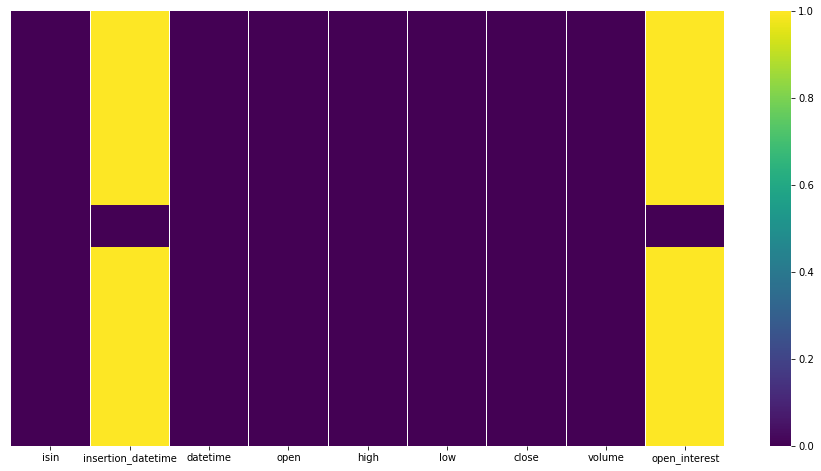

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(stock_df.isnull(), yticklabels=False, cmap='viridis')

In [15]:
# There is too much of data issing from these two fields
# Let's remove these columns from our data

stock_df.drop(labels=['insertion_datetime','open_interest'], axis=1, inplace=True)

In [16]:
# Look at the data after cleaning the columns
stock_df.head()

,isin,datetime,open,high,low,close,volume
0,INE545A01016,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281
1,INE545A01016,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315
2,INE545A01016,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760
3,INE545A01016,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653
4,INE545A01016,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744


In [17]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
isin        500000 non-null object
datetime    500000 non-null datetime64[ns]
open        500000 non-null float64
high        500000 non-null float64
low         500000 non-null float64
close       500000 non-null float64
volume      500000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.7+ MB


In [18]:
# # We have to convert the datetime column into data_time_stamp datatype
stock_df['datetime'] = pd.to_datetime(stock_df['datetime'])

In [19]:
stock_df['datetime'][0]

Timestamp('2018-01-01 09:15:00')

In [20]:
# Let's look at the datatyped of our dataFrame
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
isin        500000 non-null object
datetime    500000 non-null datetime64[ns]
open        500000 non-null float64
high        500000 non-null float64
low         500000 non-null float64
close       500000 non-null float64
volume      500000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.7+ MB


In [21]:
# Let's create a column named Date to group them for analysis
import datetime as datetime
stock_df['date'] = stock_df['datetime'].apply(lambda x: datetime.datetime.date(x))

In [22]:
stock_df.head(5)

,isin,datetime,open,high,low,close,volume,date
0,INE545A01016,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,2018-01-01
1,INE545A01016,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,2018-01-01
2,INE545A01016,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,2018-01-01
3,INE545A01016,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,2018-01-01
4,INE545A01016,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,2018-01-01


In [23]:
# Let's check how many companies data available with us and seperate them for analysis
print('*'*50)
print('{} Companies stock information is available'.format(stock_df['isin'].nunique()))
print('*'*50)
companies = stock_df['isin'].unique()
companies

**************************************************
7 Companies stock information is available
**************************************************


array(['INE545A01016', 'INE265F01028', 'INE221B01012', 'dummy1611',
       'dummy3751', 'dummy3811', 'INE492A01029'], dtype=object)

In [24]:
# Let's seggregate the 7 companies data into unique dataframes for each company analysis
company1 = stock_df[stock_df['isin'] == companies[0]]
company2 = stock_df[stock_df['isin'] == companies[1]]
company3 = stock_df[stock_df['isin'] == companies[2]]
company4 = stock_df[stock_df['isin'] == companies[3]]
company5 = stock_df[stock_df['isin'] == companies[4]]
company6 = stock_df[stock_df['isin'] == companies[5]]
company7 = stock_df[stock_df['isin'] == companies[6]]

In [25]:
company1.head()

,isin,datetime,open,high,low,close,volume,date
0,INE545A01016,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,2018-01-01
1,INE545A01016,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,2018-01-01
2,INE545A01016,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,2018-01-01
3,INE545A01016,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,2018-01-01
4,INE545A01016,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,2018-01-01


In [26]:
# Let's look at the size of data available with the companies dataFrames
company1.shape, company2.shape, company3.shape, company4.shape, company5.shape, company6.shape, company7.shape

((161138, 8),
 (110870, 8),
 (111586, 8),
 (25780, 8),
 (39827, 8),
 (5928, 8),
 (44871, 8))

In [27]:
# Let's Group the company data frames by Data using the Mathematical operaition Mean()

company1 = company1.groupby('date').mean()
company2 = company2.groupby('date').mean()
company3 = company3.groupby('date').mean()
company4 = company4.groupby('date').mean()
company5 = company5.groupby('date').mean()
company6 = company6.groupby('date').mean()
company7 = company7.groupby('date').mean()

In [28]:
company1.head(5)

,open,high,low,close,volume
date,,,,,
2017-04-03,223.939467,224.063467,223.889067,224.018800,84.706667
2017-04-05,239.267962,239.616756,239.146381,239.474263,1629.825737
2017-04-06,264.126933,264.475600,263.856800,264.190133,768.738667
2017-04-07,272.544400,273.084933,272.266933,272.739067,1010.317333
2017-04-10,277.076533,277.424400,276.920400,277.236667,324.568000


---

## 05 -- Data Visualization

In [29]:
# Let us lok at the stats of each company by obtaining least & maximum stock value
company1.describe()

,open,high,low,close,volume
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,2357.522233,2359.658505,2355.549199,2357.691395,1164.876573
std,1449.792394,1450.967987,1448.635021,1449.851531,1160.964095
min,223.939467,224.063467,223.889067,224.018800,14.808000
25%,705.032833,705.472900,704.563100,705.006333,349.958667
50%,2723.576933,2725.875467,2721.754533,2723.876400,821.194667
75%,3661.312000,3665.068533,3657.164300,3661.375900,1584.107333
max,4656.490933,4662.949600,4649.350133,4655.705200,7711.826667


In [30]:
company1[company1['high'] == 4662.9496]

,open,high,low,close,volume
date,,,,,
2018-10-17,4656.490933,4662.9496,4649.350133,4655.7052,1788.336


Text(0.5, 1.0, 'Company_1')

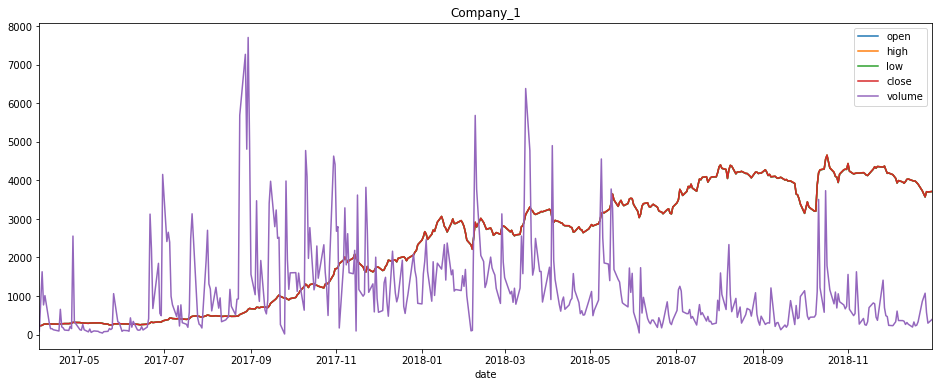

In [31]:
# Let's visualize each & every company stock data
company1.plot(figsize=(16,6))
plt.title('Company_1')

- Due to very tiny difference between open & close values of stock price, we are unable to identify the plots, have a look below

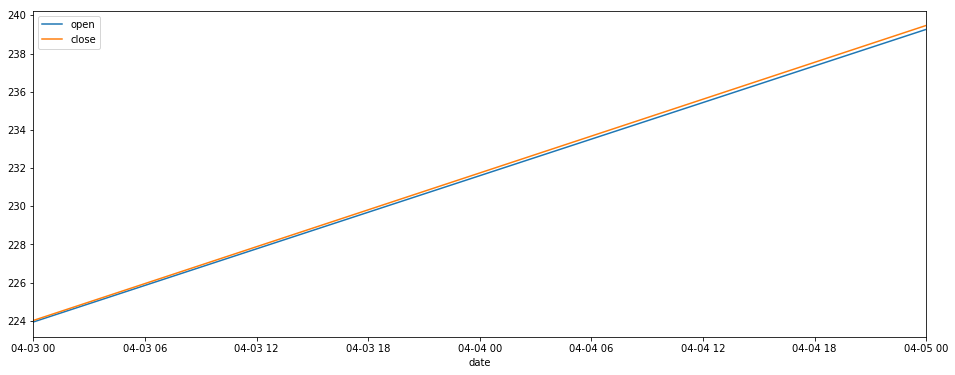

In [32]:
company1[['open','close']][:2].plot(subplots=False, figsize=(16,6))

In [33]:
companies = [company1, company2, company3, company4, company5, company6, company7]

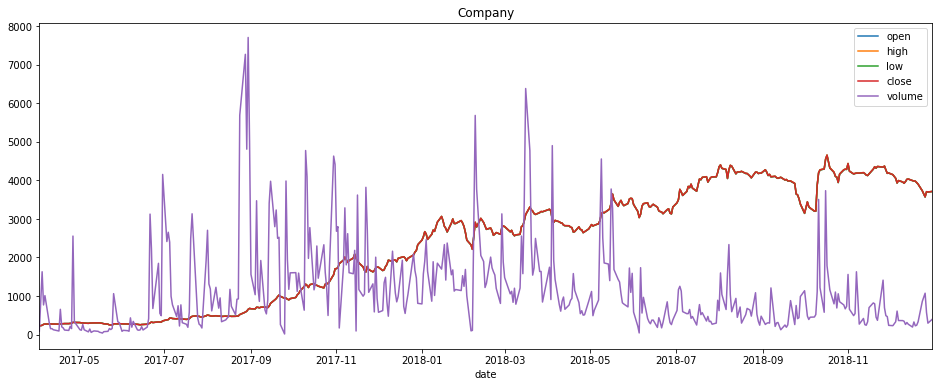

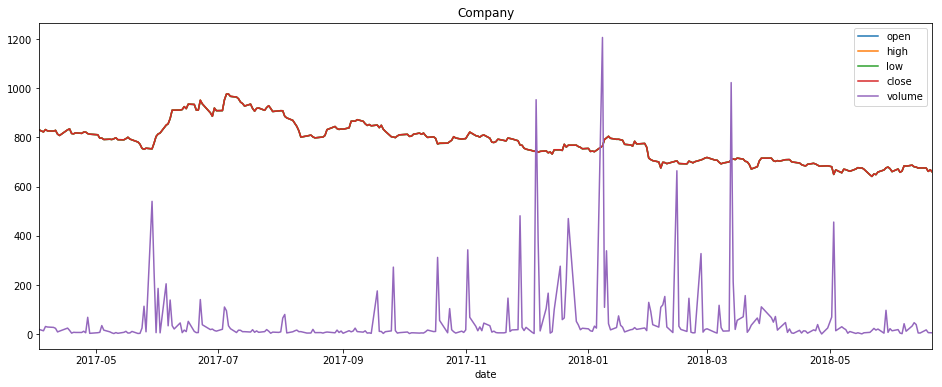

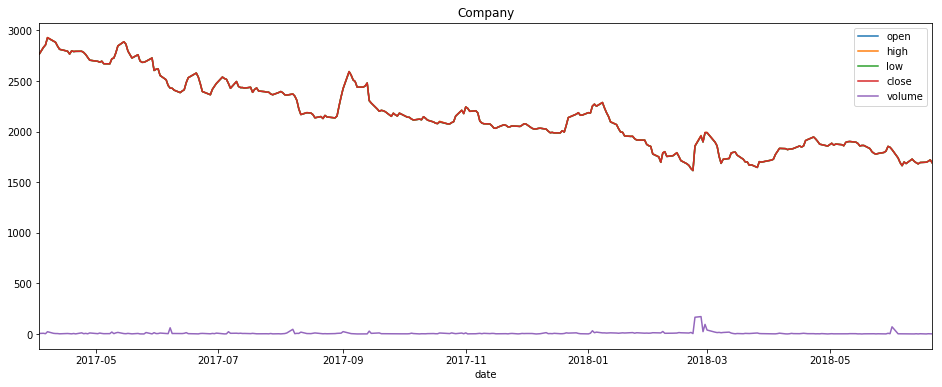

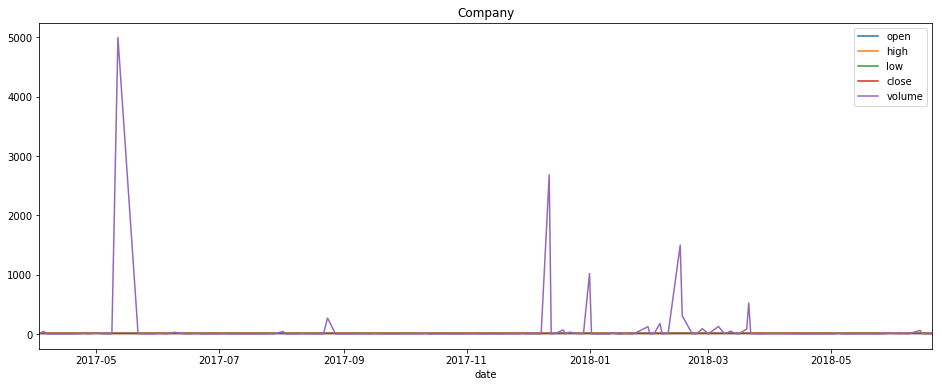

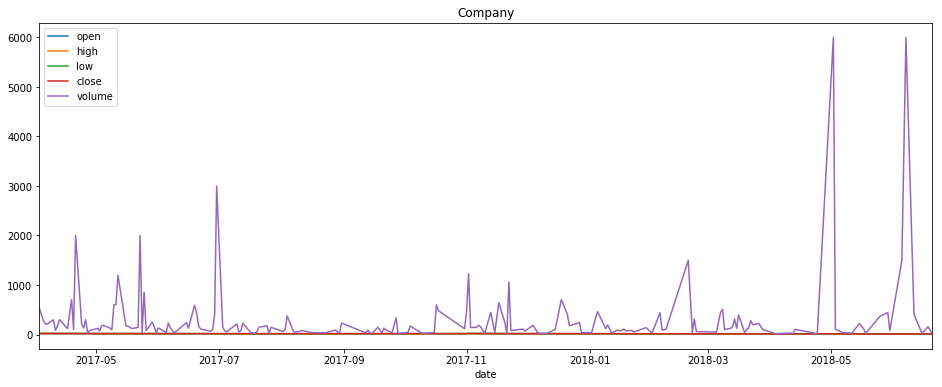

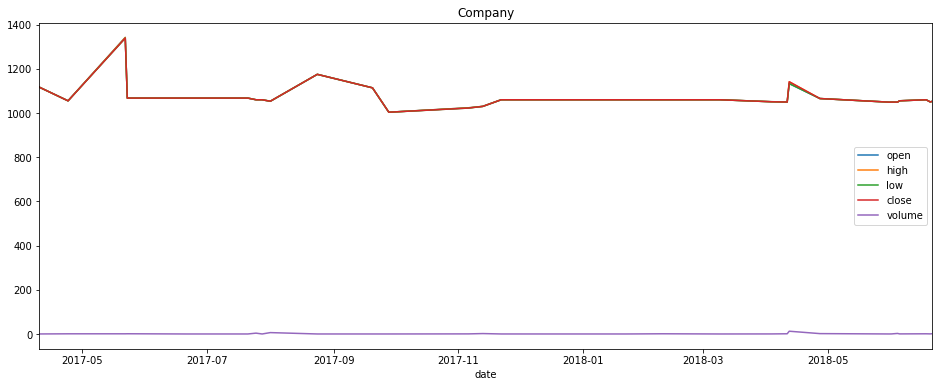

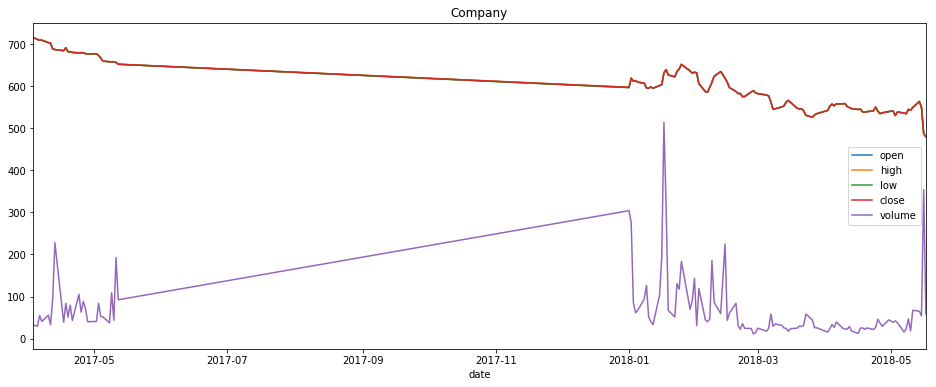

In [34]:
# Let's look at all the figures
for i in companies:
    i.plot(figsize=(16,6))
    plt.title('Company')

---

- `From the figures we can say that Company_1, COmpany_2 & Company_3 are having Linear Relation from the plots obtained`
- `Let's build a linear model for Company_1 which will leads to the same for the remaining 2 companies.`

---

## 06 -- Data Cleaning for our Model Preparation

In [35]:
for i in companies:
    i.reset_index(inplace=True)

In [36]:
# Let's check wether the index changed or not
company1.head()

,date,open,high,low,close,volume
0,2017-04-03,223.939467,224.063467,223.889067,224.018800,84.706667
1,2017-04-05,239.267962,239.616756,239.146381,239.474263,1629.825737
2,2017-04-06,264.126933,264.475600,263.856800,264.190133,768.738667
3,2017-04-07,272.544400,273.084933,272.266933,272.739067,1010.317333
4,2017-04-10,277.076533,277.424400,276.920400,277.236667,324.568000


In [37]:
# We will change the dates into list and enumerate them with integers for plotting.

# For company1
#-----------------------------------------------
c1_dates = company1.index.tolist()
c1_closed = company1['close'].tolist()
c1_volume = company1['volume'].tolist()
#-----------------------------------------------
c1_dates = np.reshape(c1_dates, len(c1_dates),1)
c1_closed = np.reshape(c1_closed, len(c1_closed),1)
c1_volume = np.reshape(c1_volume, len(c1_volume),1)
#-----------------------------------------------
c1_dates[:5], c1_closed[:5]

(array([0, 1, 2, 3, 4]),
 array([224.0188    , 239.47426273, 264.19013333, 272.73906667,
        277.23666667]))

Text(0.5, 1.0, 'Company_1')

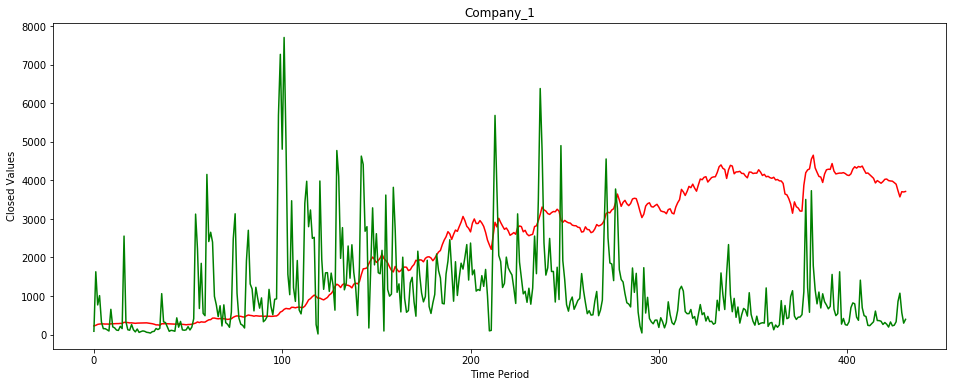

In [38]:
# Let's look at the plot data
plt.figure(figsize=(16,6))
plt.plot(c1_dates, c1_closed,'r')
plt.plot(c1_dates, c1_volume, 'g')
plt.xlabel('Time Period')
plt.ylabel('Closed Values')
plt.title('Company_1')

## 07 -- Linear Model Building

In [39]:
# Let us create a model using scikit learn Linear Regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
# Create a data frame for Seaborn Analysis
c1_df = pd.DataFrame(data=c1_dates, columns=['Dates'])

In [41]:
c1_df['Closed'] = c1_closed

In [42]:
c1_df.head()

,Dates,Closed
0,0,224.018800
1,1,239.474263
2,2,264.190133
3,3,272.739067
4,4,277.236667


---

## 08 -- Seaborn Analysis

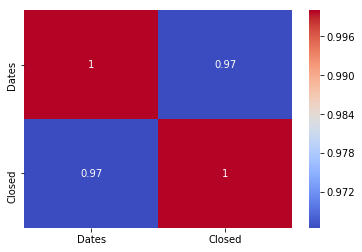

In [43]:
sns.heatmap(c1_df.corr(), cmap='coolwarm', annot=True)

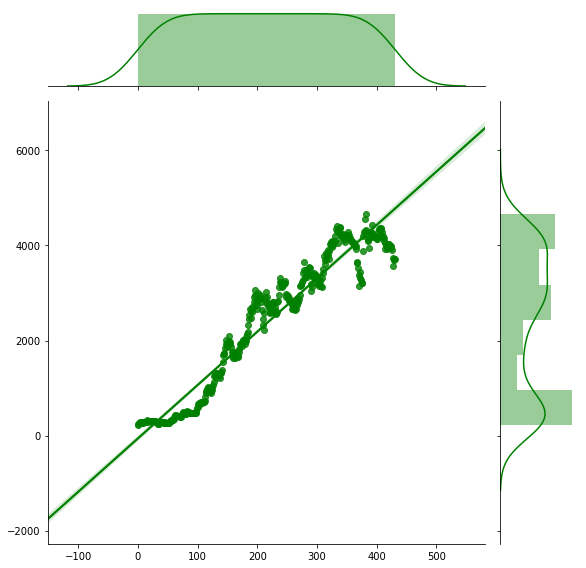

In [44]:
sns.jointplot(c1_dates, c1_closed,  kind='reg', height=8, color='g')

In [45]:
X = c1_df.drop(['Closed'], axis=1)
y = c1_df['Closed']

In [46]:
# Scaling the data using Standard Scalar will provide very best results for regression techniques
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# y = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 1), (87, 1), (345,), (87,))

In [48]:
# Let us create a model instance for Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# Predicting the values from our model & r2 score(accuracy)
y_pred = model.predict(X_test)
print('R2_Score for test data : ',r2_score(y_test, y_pred))
print('Mean Squared Error for test data : ',mean_squared_error(y_test,y_pred))

R2_Score for test data :  0.9317166989056075
Mean Squared Error for test data :  138434.43228712064


In [50]:
# Predicting the same values on Training Set
y_tr_pred = model.predict(X_train)
print('R2_Score for training data : ',r2_score(y_train, y_tr_pred))
print('Mean Squared Error of training data: ',mean_squared_error(y_train, y_tr_pred))

R2_Score for training data :  0.9345735338693248
Mean Squared Error of training data:  138209.98046723264


In [51]:
print('*'*50)
print('The accuracy of Linear Model created is {}% '.format(round(r2_score(y_test, y_pred)*100)))
print('*'*50)

**************************************************
The accuracy of Linear Model created is 93.0% 
**************************************************


In [52]:
# Similarly we can do the same for the remainig companies stock data

In [53]:
company2.corr()

,open,high,low,close,volume
open,1.000000,0.999998,0.999998,1.000000,-0.098048
high,0.999998,1.000000,0.999993,0.999998,-0.097519
low,0.999998,0.999993,1.000000,0.999998,-0.098593
close,1.000000,0.999998,0.999998,1.000000,-0.098040
volume,-0.098048,-0.097519,-0.098593,-0.098040,1.000000


- We can see that the volume is negatively related to our data so we will not include it in model training.

In [54]:
end = time.time()
print('#'*65)
print('Time taken to retrieve the model is : {} Seconds '.format(end - start))
print('#'*65)

#################################################################
Time taken to retrieve the model is : 10.098395347595215 Seconds 
#################################################################


---

## 09 -- Conclusion

#### 93% Accurate Linear Model Obtained
#### Total time tajen to run the files : 10 Seconds

- SQL Connector Library helped us to retrieve data from the servers easily
- Pandas library helped us alot by converting the data & storing the data in csv file
- The recieved data is not much jumbled and cleaning of data become a bit easy task for us, Thanks for the data collectors
- Successfully plotted all the companies stock price information using the pandas plotting tool/library
- Trained our model using Sci-Kit Linear Regression 
- We have recieved very less time for executing the code & we can also use this model to display the data live in terms
- An accuracy of 93% for a linear model is a very good fit.
- SOme of the companies data is not rising and not falling apart.
- Refresh the data / Loadng the data will take only 10 minutes